In [1]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import re
import nltk
import random
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
from functools import reduce
from itertools import chain
from wordcloud import WordCloud
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU,  Embedding
from keras.activations import tanh, relu, sigmoid, softmax, swish
from keras.regularizers import L1, L2, L1L2
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber, BinaryCrossentropy
import keras.utils as image
from google.colab.patches import cv2_imshow
from keras.utils import plot_model

##### Plotting the confusion matrix #####
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

###### NLP Libraries ######

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

###### Download functions for nltk ######

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#####Import the dataset

In [17]:
train_data = pd.read_csv('/content/test.csv')
test_data  = pd.read_csv('/content/train.csv')

#### Concat these two dataset
df = pd.concat([train_data, test_data], axis = 0)

df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


#####Remove the first two columns

In [18]:
df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


###Perform the EDA

In [19]:
#### Check NaN value
if df.isnull().sum().sum() > 0:
  print("There is NaN value presence in the dataset.\n")
  column_name  = df.isnull().sum()[df.isnull().sum() > 0].index
  nan_quantity = df.isnull().sum()[df.isnull().sum() > 0].values
  print("Column: {} - NaN quantity # {} ".format(column_name[0], nan_quantity[0]))

There is NaN value presence in the dataset.

Column: Arrival Delay in Minutes - NaN quantity # 393 


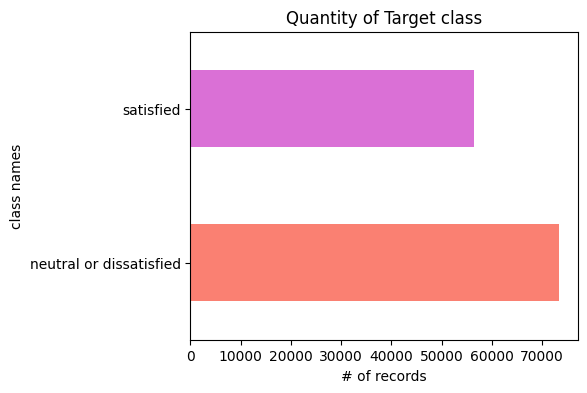

In [20]:
#### Check the target class
plt.figure(figsize=(5, 4))
plt.title('Quantity of Target class')
colors = ['salmon', 'orchid']
df.iloc[:, -1].value_counts().plot(kind = 'barh', color=colors)
plt.xlabel("# of records")
plt.ylabel("class names")
plt.show()

#####Convert this target class into numerical representation

In [21]:
df.iloc[:, -1] = df.iloc[:, -1].\
                 map({value: index for index,\
                      value in enumerate(df.iloc[:, -1].\
                      value_counts().index)})

df.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1


In [22]:
# Show the data types
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [23]:
# Take the categorical data
cat_df = df[df.dtypes[df.dtypes.values == 'O'].index]
cat_df.head()

,Gender,Customer Type,Type of Travel,Class
0,Female,Loyal Customer,Business travel,Eco
1,Female,Loyal Customer,Business travel,Business
2,Male,disloyal Customer,Business travel,Eco
3,Male,Loyal Customer,Business travel,Business
4,Female,Loyal Customer,Business travel,Eco


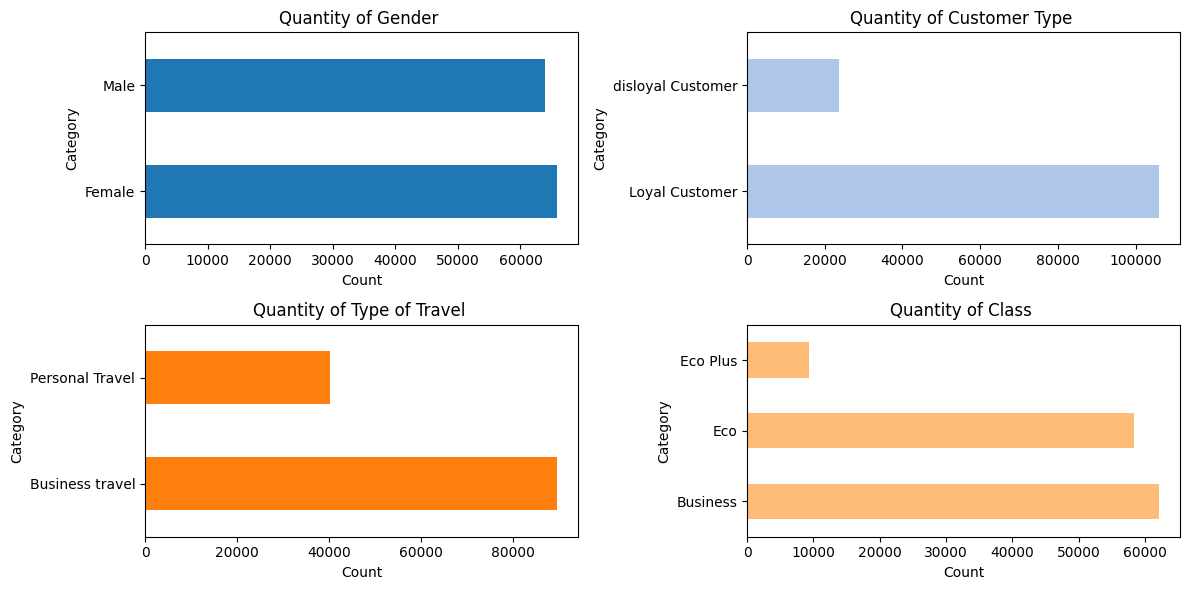

In [ ]:
# Check the quantity of categorical_data
plt.figure(figsize = (12, 6))
colors = plt.cm.tab20.colors[:len(cat_df.columns)]
for index, column in enumerate(cat_df):
  plt.subplot(2, 2, index + 1)
  cat_df[column].value_counts().plot(kind = 'barh', color = colors[index])
  plt.title("Quantity of {} ".format(column))
  plt.xlabel('Count')
  plt.ylabel('Category')

plt.tight_layout()
plt.show()

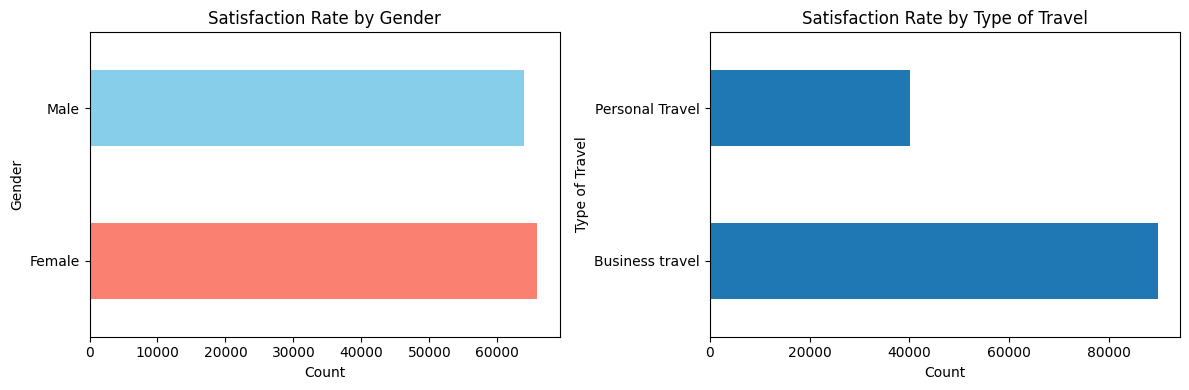

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the satisfaction rates by gender in the first subplot
df.groupby(['Gender'])['satisfaction'].count().plot(kind='barh', stacked=True, color=['salmon', 'skyblue'], ax=axes[0])
axes[0].set_title('Satisfaction Rate by Gender')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Gender')

# Plotting the satisfaction rates by type of travel in the second subplot
df.groupby(['Type of Travel'])['satisfaction'].count().plot(kind='barh', stacked=True, ax=axes[1])
axes[1].set_title('Satisfaction Rate by Type of Travel')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Type of Travel')

plt.tight_layout()
plt.show()

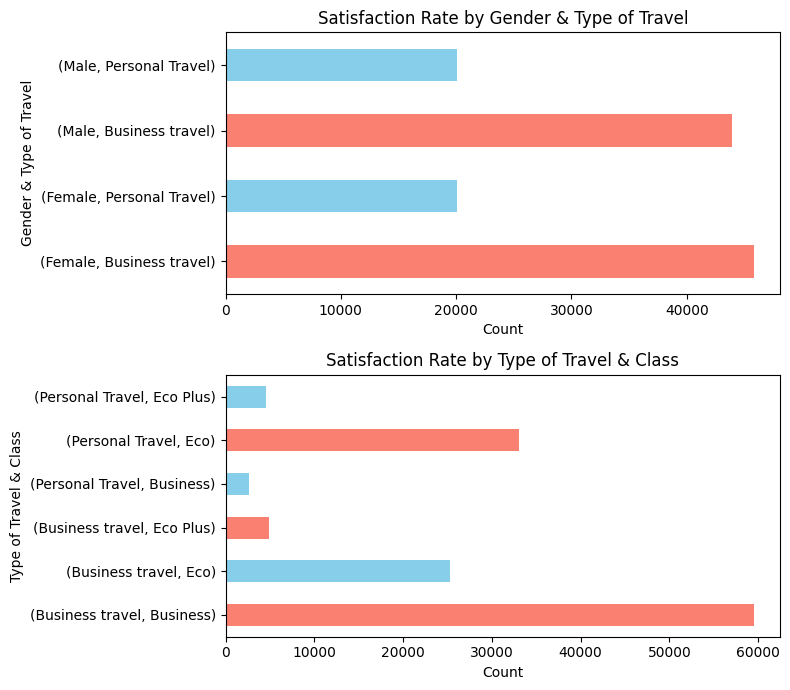

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(2, 1, figsize=(8, 7))

# find out the query that gives the highest satisfaction rate based on their gender and travel type
df.groupby(['Gender', 'Type of Travel'])['satisfaction'].count().plot(kind = 'barh', stacked=True, color=['salmon', 'skyblue'], ax=axes[0])
axes[0].set_title('Satisfaction Rate by Gender & Type of Travel')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Gender & Type of Travel')

# Find out a query that gives the highest satisfaction rate based on their type of travel and and quantity of class
df.groupby(['Type of Travel', 'Class'])['satisfaction'].count().plot(kind = 'barh', stacked=True, color=['salmon', 'skyblue'], ax=axes[1])
axes[1].set_title('Satisfaction Rate by Type of Travel & Class')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Type of Travel & Class')
plt.tight_layout()
plt.show()

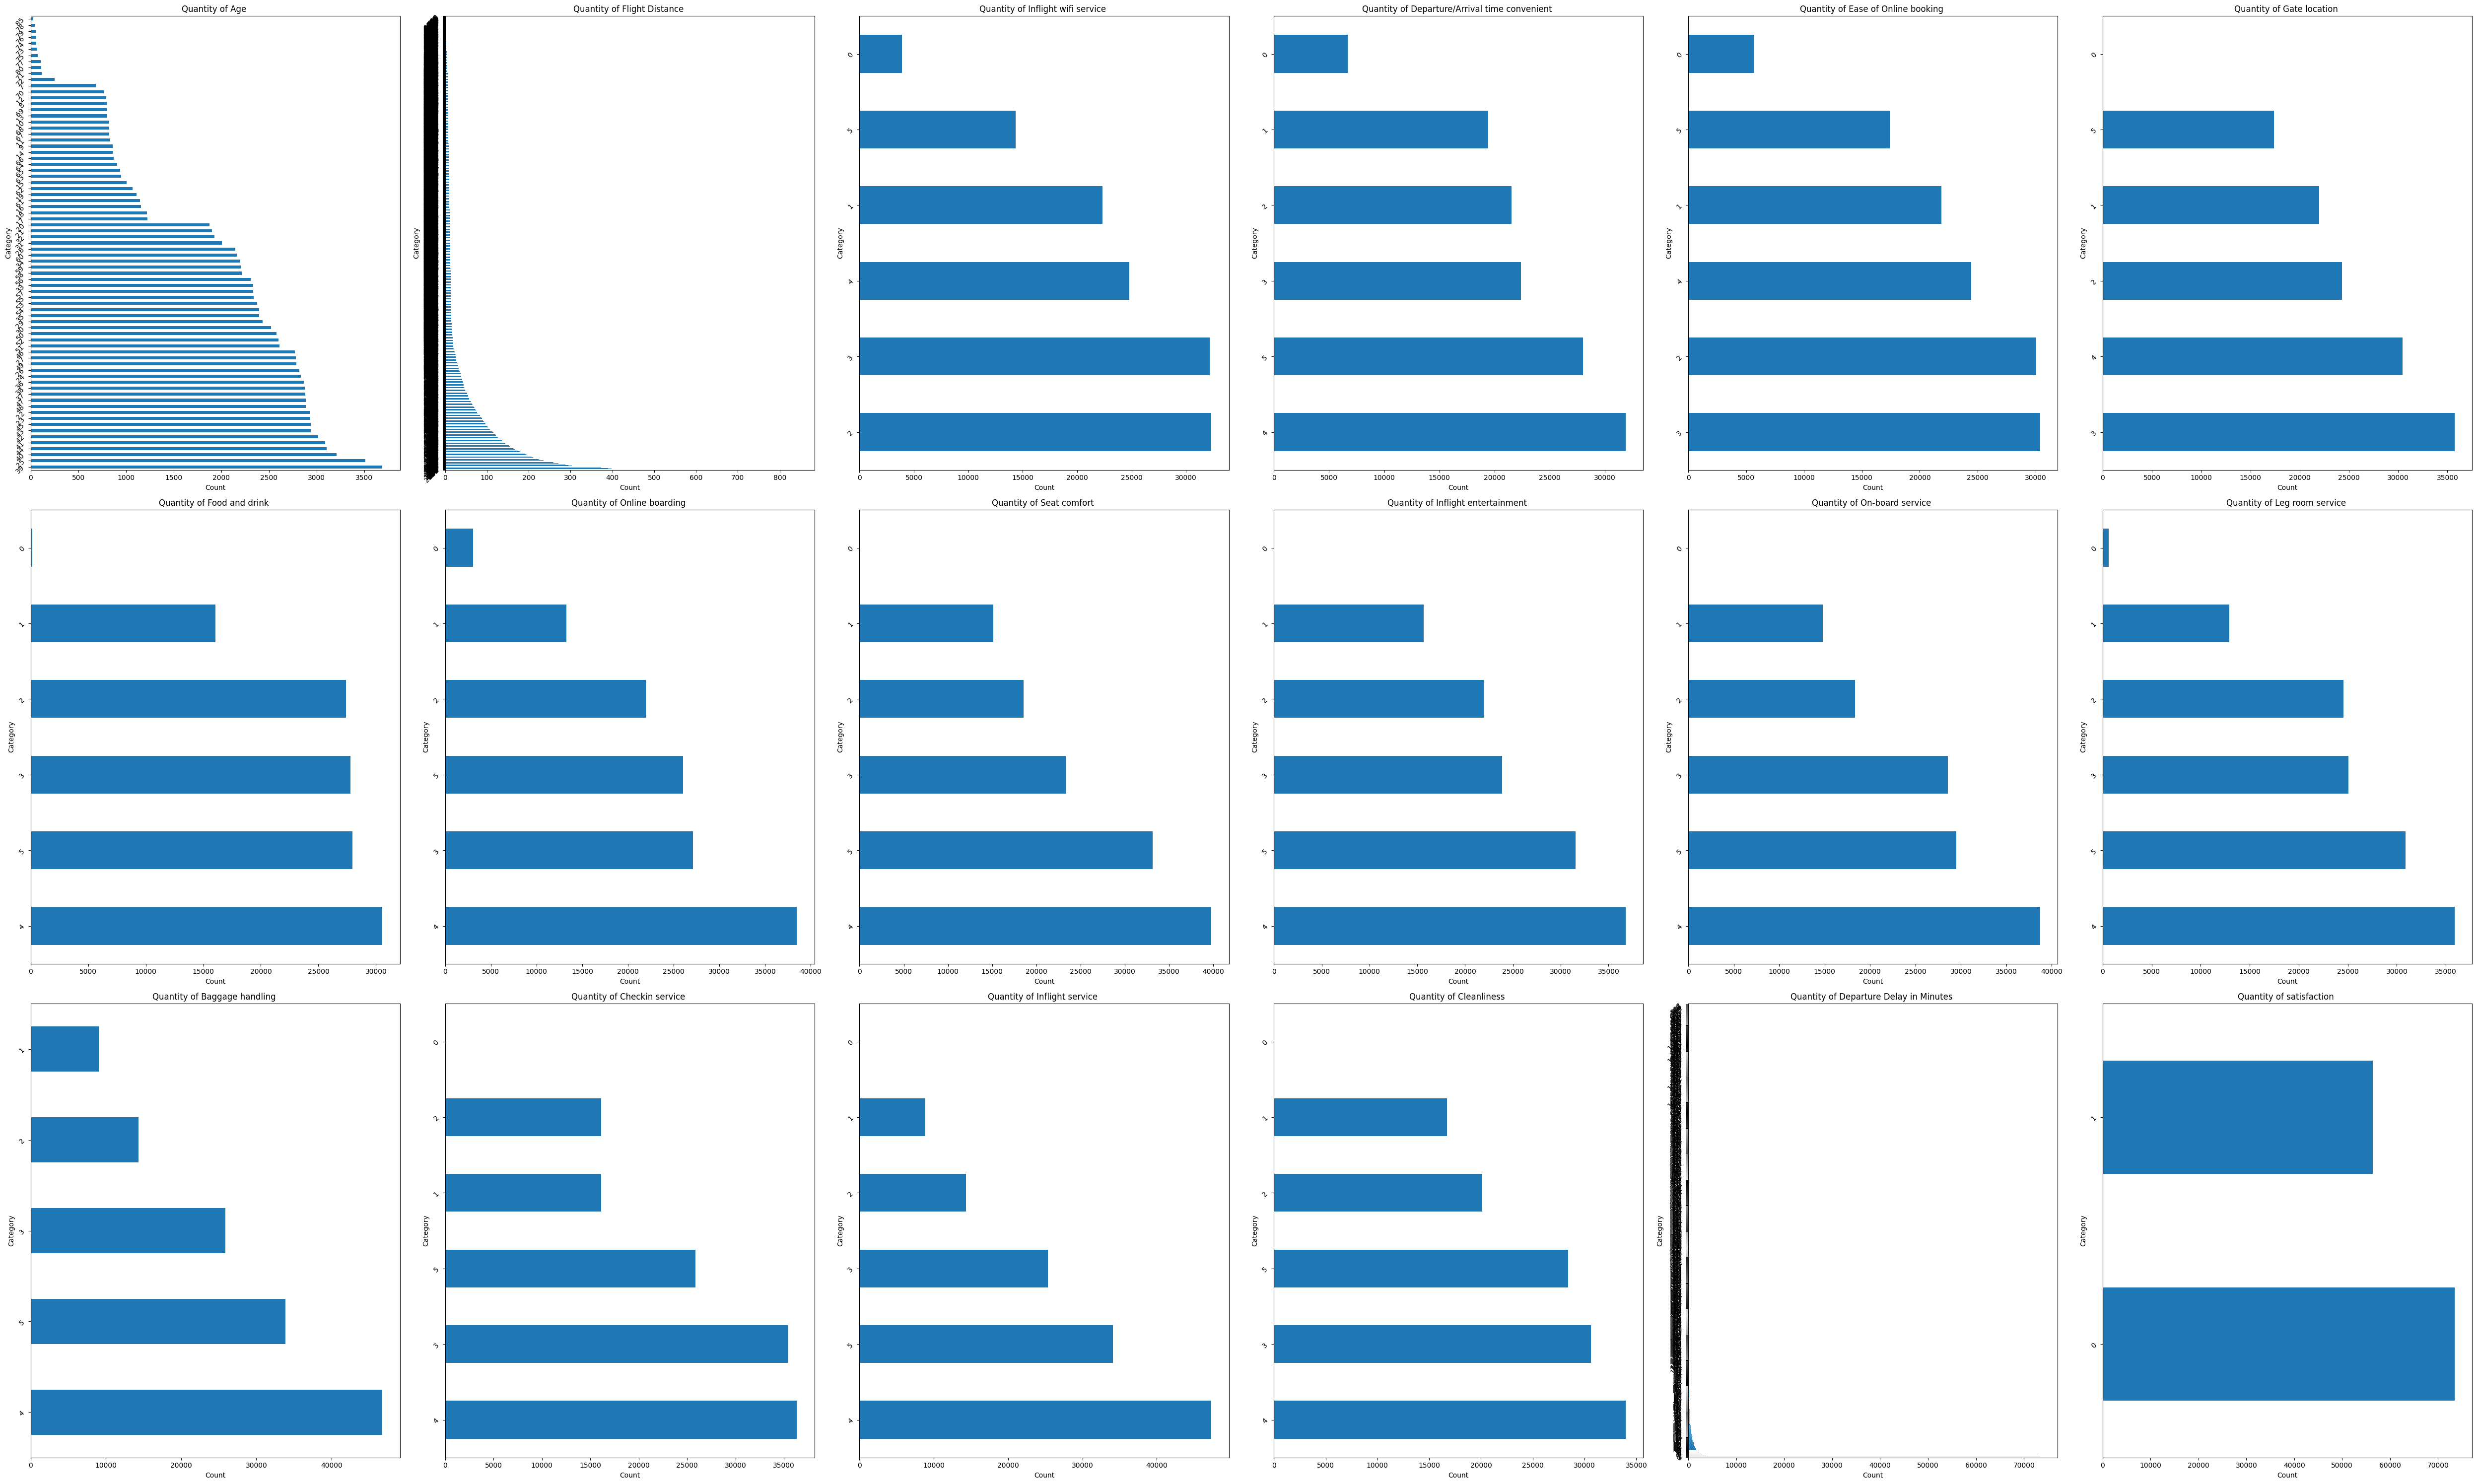

In [ ]:
# Show the quantity of all numerical dataset
plt.figure(figsize = (50, 30))
colors = plt.cm.tab20.colors[:len(df.dtypes[df.dtypes.values == 'int64'].index)]
for index, column in enumerate(df.dtypes[df.dtypes.values == 'int64'].index):
  plt.subplot(3, 6, index + 1)
  df.loc[:, column].value_counts().plot(kind = 'barh')
  plt.title("Quantity of {} ".format(column))
  plt.xlabel("Count")
  plt.ylabel("Category")
  plt.yticks(rotation = 45)

plt.tight_layout()
plt.show()

In [ ]:
# Show the describe of this dataset
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,0.434463
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650,0.495688
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [ ]:
# Find out the satisfaction ratio based on online booking & customer type
df.pivot_table(values = 'satisfaction', index = 'Ease of Online booking', columns = 'Customer Type', aggfunc = ['mean'], margins=True)

mean                            
Customer Type          Loyal Customer disloyal Customer       All
Ease of Online booking                                           
0                            0.641983          0.763587  0.665611
1                            0.451586          0.017597  0.379466
2                            0.373891          0.016551  0.303484
3                            0.375811          0.045342  0.310104
4                            0.547144          0.466354  0.531623
5                            0.702559          0.937789  0.734676
All                          0.478115          0.239697  0.434463

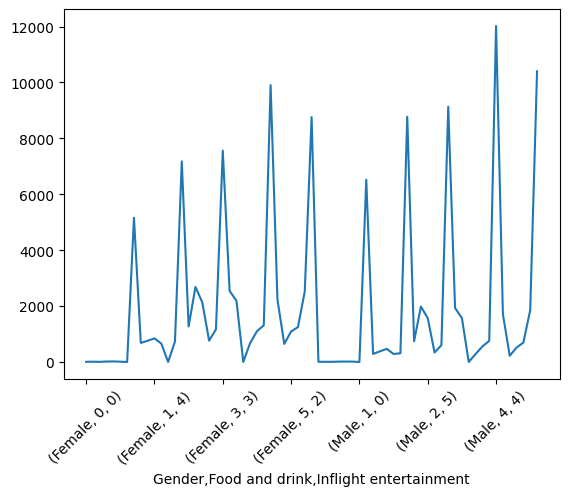

In [ ]:
# Find out which gender is giving the highest satisfaction rate based on Food and drink and Inflight entertainment
df.groupby(['Gender', 'Food and drink', 'Inflight entertainment'])['satisfaction'].count().plot()
plt.xticks(rotation = 45)
plt.show()

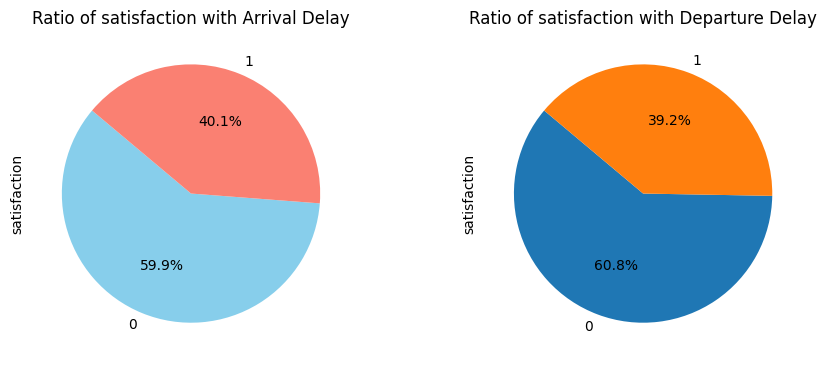

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10, 16))
plt.subplots_adjust(wspace=0.4)

# Find out the satisfaction ratio despite the fact that Departure Delay in Minutes y was happened due to some reasons
df[df.index.isin(df.loc[:, 'Arrival Delay in Minutes'].\
                 sort_values(ascending = False).dropna().\
                 index[0:1000])]['satisfaction'].value_counts().\
                 plot(kind = 'pie',\
                 colors=['skyblue', 'salmon'], autopct='%1.1f%%', startangle=140, ax = axes[0])

axes[0].set_title("Ratio of satisfaction with Arrival Delay")

# Find out the satisfaction ratio despite the fact that Departure Delay in Minutes was happened due to some reasons
df[df.index.isin(df.loc[:, 'Departure Delay in Minutes'].\
                 sort_values(ascending = False).dropna().\
                 index[0:1000])]['satisfaction'].value_counts().\
                 plot(kind = 'pie',\
                 autopct='%1.1f%%', startangle=140, ax = axes[1])

axes[1].set_title("Ratio of satisfaction with Departure Delay")
plt.show()

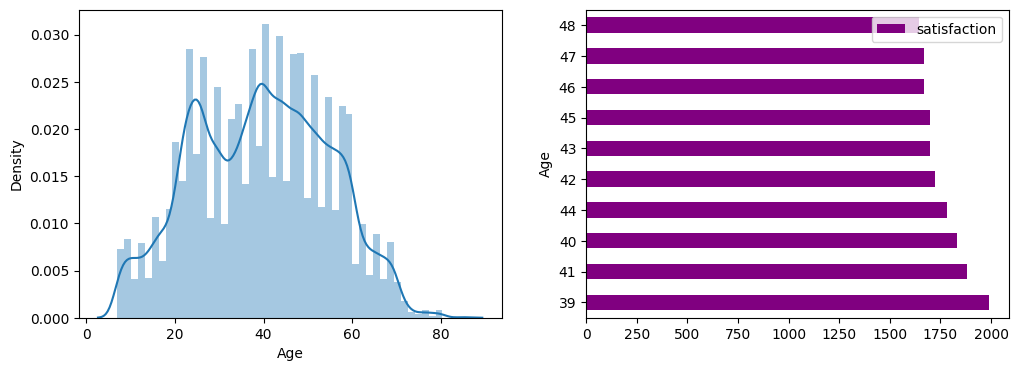

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
# Find the distribution of Age
sns.distplot(df.loc[:, 'Age'], ax = axes[0])

# Find out which aged people like the most flight
colors = ['purple']
df.groupby(['Age'])['satisfaction'].sum().\
                                   reset_index().sort_values(ascending = False,\
                                   by = ['satisfaction']).head(10).set_index('Age').\
                                   plot(kind = 'barh',\
                                   color = colors,\
                                   ax = axes[1])
plt.show()

#####Feature Engineering

In [24]:
# Check duplicated instances
'Presence' if df.duplicated().sum() > 0 else 'No dupliated instances'

'No dupliated instances'

In [25]:
# Convert the categorical features into numerical representation
"""
Convert the Gender column into Numerical Representation
"""
df.loc[:, 'Gender'] = df.loc[:, 'Gender'].\
                      map({value: index for index, value in enumerate(df.loc[:, 'Gender'].unique())})

"""
Convert the Customer Type column into Neumerical Represenation
"""
df.loc[:, 'Customer Type'] = df.loc[:, 'Customer Type'].map({column:value for column, value in zip(df.groupby(['Customer Type'])['satisfaction'].\
                                                                      mean().index, df.groupby(['Customer Type'])['satisfaction'].\
                                                                      mean().values)})

"""
Convert the Type of Travel column into Neumerical Represenation
"""
df.loc[:, 'Type of Travel'] = df.loc[:, 'Type of Travel'].map({column:value for column, value in zip(df.groupby(['Type of Travel'])['satisfaction'].\
                                                                      mean().index, df.groupby(['Type of Travel'])['satisfaction'].\
                                                                      mean().values)})

"""
Convert the Class column into Neumerical Represenation
"""
df.loc[:, 'Class'] = df.loc[:, 'Class'].map({column:value for column, value in zip(df.groupby(['Class'])['satisfaction'].\
                                                                      mean().index, df.groupby(['Class'])['satisfaction'].\
                                                                      mean().values)})

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0.478115,52,0.583724,0.187673,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0.478115,36,0.583724,0.694434,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,0.239697,20,0.583724,0.187673,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0.478115,44,0.583724,0.694434,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0.478115,49,0.583724,0.187673,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [26]:
# Remove the NaN
try:
  df.dropna(axis = 0, inplace = True)
except Exception as e:
  print(e.with_traceback)
else:
  print("The shape of old dataset # {} ".format(cat_df.shape[0]),'\n')
  print("The shape of new dataset # {} ".format(df.shape[0]))

The shape of old dataset # 129880  

The shape of new dataset # 129487 


#####Find the top features (Feature Selection using Pearson Correlation Technique)

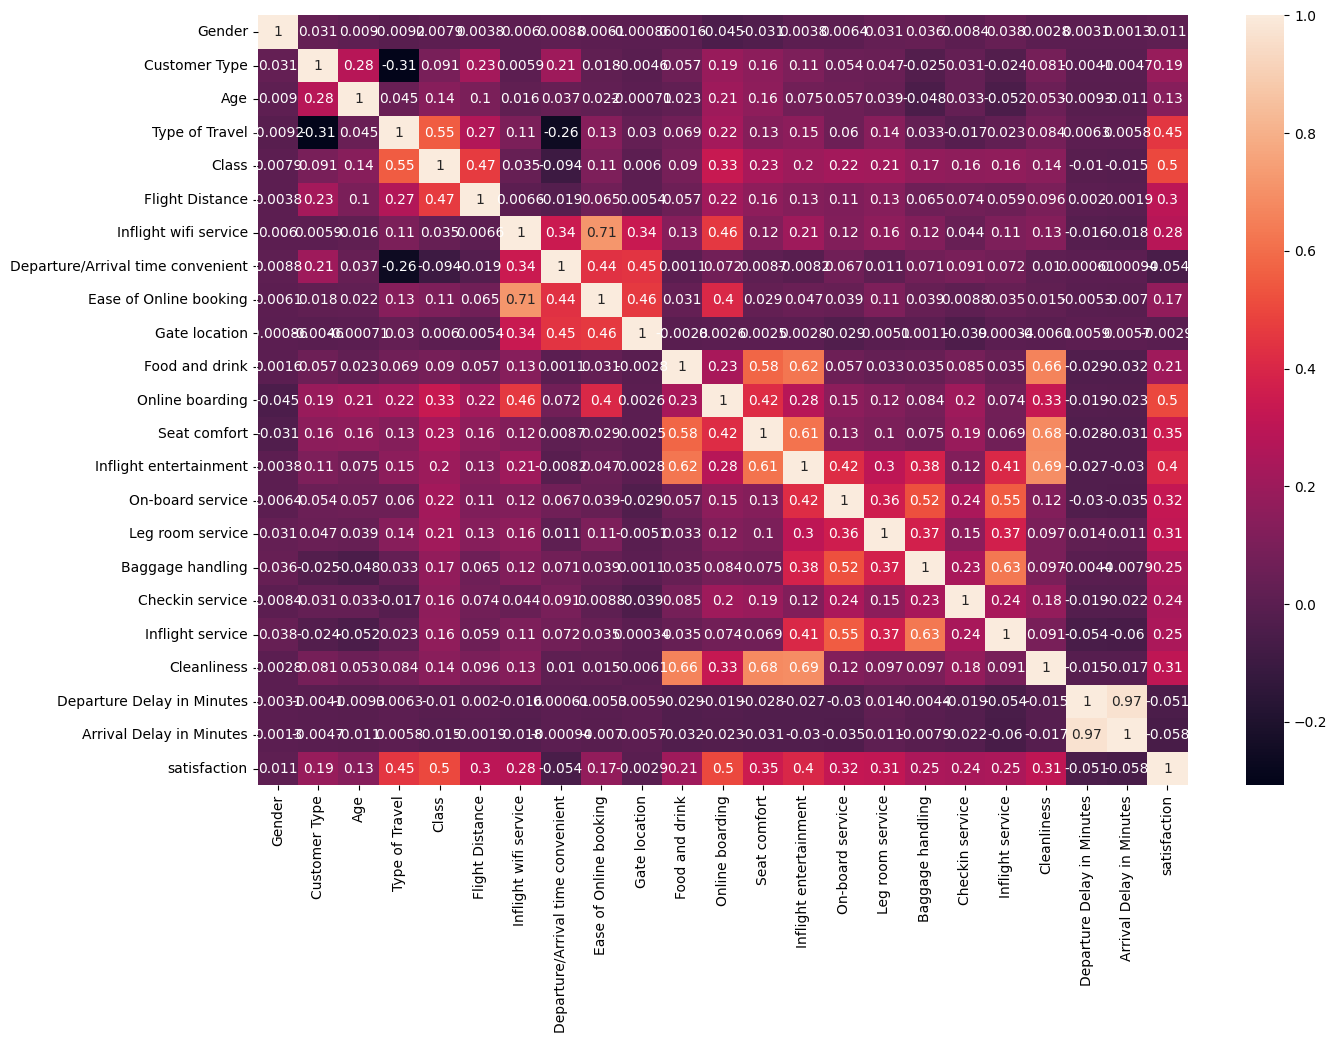

'\nComments: Co-realtion is quite less. So, there is no need to delete using Pearson-Corelation Technique\n'

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()
"""
Comments: Co-realtion is quite less. So, there is no need to delete using Pearson-Corelation Technique
"""

#####Split the dataset into train & test

In [27]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

print("X_train shape # {} ".format(X_train.shape),'\n')
print("X_test shape  # {} ".format(X_test.shape),'\n')
print("y_train shape # {} ".format(y_train.shape),'\n')
print("y_test shape  # {} ".format(y_test.shape))

X_train shape # (90640, 22)  

X_test shape  # (38847, 22)  

y_train shape # (90640,)  

y_test shape  # (38847,) 


#####Convert the split data into Float that is accepted by Torch

In [28]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

"""

   torch.tensor(data, dtype) will convert the data type into Float and this will have to do for all train and test

"""
X_train = torch.tensor(data = X_train, dtype = torch.float32)
y_train = torch.tensor(data = y_train, dtype = torch.float32)

X_test  = torch.tensor(data = X_test, dtype = torch.float32)
y_test  = torch.tensor(data = y_test, dtype = torch.float32)

#####Define the DataLoader to define the batch_size

In [29]:
"""
    BATCH_SIZE = 128
    loader object returns two parameters at a time
    1. dataset with batch_size
    2. label with respect to batch

"""
BATCH_SIZE = 64
train_loader = DataLoader(dataset = list(zip(X_train, y_train)), batch_size = BATCH_SIZE, shuffle = True)
test_loader  = DataLoader(dataset = list(zip(X_test, y_test)), batch_size = BATCH_SIZE, shuffle = True)

train_data, train_label = next(iter(train_loader))
test_data, test_label   = next(iter(train_loader))

print("Batch size  # {} ".format(train_loader.batch_size),'\n')
print("Data shape  # {} - (Training)".format(train_data.shape),'\n')
print("Label shape # {} - (Training)".format(train_label.shape),'\n')
print("*"*50)
print("Data shape  # {} - (Testing)".format(test_data.shape),'\n')
print("Label shape # {} - (Testing)".format(test_label.shape))

Batch size  # 64  

Data shape  # torch.Size([64, 22]) - (Training) 

Label shape # torch.Size([64]) - (Training) 

**************************************************
Data shape  # torch.Size([64, 22]) - (Testing) 

Label shape # torch.Size([64]) - (Testing)


#####Model building

In [30]:
"""

   Define a class named AirlineClassifer with ``Constructor` that will take TWO parameters
   1. input_dimension  : This would be the `number of independent` features
   2. output_dimension : This would be the `number of output` : Here, the problem is binary class classification so it would be 1

"""
DROPOUT_RATIO = 0.3

class AirlineClassifer(nn.Module):
  def __init__(self, input_dimension = None, output_dimension = None):
    # Call the super function that will inherit all the functions of NN
    super().__init__()

    """

      Create the First hidden layer with
      1. in_features  = input_dimension
      2. out_features = 256
      3  weight: he_normal
      4. Activation (ReLU)
      5. DropoutLayer (p = 0.5): It would be used to prevent the overfitting problem

    """
    self.hiddenLayer1 = nn.Linear(in_features = input_dimension, out_features = 256)
    # Initialize the he_norml as weight (kernel_initializer)
    torch.nn.init.kaiming_normal_(self.hiddenLayer1.weight)
    self.activation1  = nn.ReLU()
    self.dropoutLayer1= nn.Dropout(p = DROPOUT_RATIO)

    """

      Create the Second hidden layer with
      1. in_features  = 256
      2. out_features = 128
      3. weight: he_normal
      4. Activation (ReLU)
      5. DropoutLayer (p = 0.5): It would be used to prevent the overfitting problem

    """
    self.hiddenLayer2 = nn.Linear(in_features = 256, out_features = 128)
    # Initialize the `he_normal` as weight (kernel_initializer)
    torch.nn.init.kaiming_normal_(self.hiddenLayer2.weight)
    self.activation2  = nn.ReLU()
    self.dropoutLayer2= nn.Dropout(p = DROPOUT_RATIO)

    """

      Create the Third hidden layer with
      1. in_features  = 128
      2. out_features = 64
      3. weight: he_normal
      4. Activation (ReLU)

    """
    self.hiddenLayer3 = nn.Linear(in_features = 128, out_features = 64)
    # Initialize the `he_normal` as weight (kernel_initializer)
    torch.nn.init.kaiming_normal_(self.hiddenLayer3.weight)
    self.activation3  = nn.ReLU()

    """

      Create the Output Layer with
      1. in_features  = 64
      2. out_features = output_dimension
      3. weight: glorot_uniform

    """
    self.outputLayer = nn.Linear(in_features = 64, out_features = output_dimension)
    # Initialize the `glorot_uniform` as weight (kernel_initializer)
    torch.nn.init.xavier_uniform_(self.outputLayer.weight)
    self.activation  = nn.Sigmoid()

  def forward(self, x):

    """
      This is for the FirsT hidden Layer. x denotes as an independent features
    """
    x = self.activation1(self.hiddenLayer1(x))
    x = self.dropoutLayer1(x)

    """
      This is for the Second Hidden Layer
    """
    x = self.activation2(self.hiddenLayer2(x))
    x = self.dropoutLayer2(x)

    """
      This is for the Third hidden layer
    """
    x = self.activation3(self.hiddenLayer3(x))

    """
    This is for the output layer
    """
    if self.activation is not None:
      x = self.activation(self.outputLayer(x))
    else:
      x = self.outputLayer(x)

    return x

In [31]:
# Call the AirplaneClassifier
try:
  model = AirlineClassifer(input_dimension = X_train.shape[1], output_dimension = len(torch.unique(y_test)) - 1)
except Exception as e:
  print(e.with_traceback)
else:
  print(model.parameters)

<bound method Module.parameters of AirlineClassifer(
  (hiddenLayer1): Linear(in_features=22, out_features=256, bias=True)
  (activation1): ReLU()
  (dropoutLayer1): Dropout(p=0.3, inplace=False)
  (hiddenLayer2): Linear(in_features=256, out_features=128, bias=True)
  (activation2): ReLU()
  (dropoutLayer2): Dropout(p=0.3, inplace=False)
  (hiddenLayer3): Linear(in_features=128, out_features=64, bias=True)
  (activation3): ReLU()
  (outputLayer): Linear(in_features=64, out_features=1, bias=True)
  (activation): Sigmoid()
)>


In [32]:
# Display the summary of defined model
summary(model = model, input_size = X_train.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1           [-1, 90640, 256]           5,888
              ReLU-2           [-1, 90640, 256]               0
           Dropout-3           [-1, 90640, 256]               0
            Linear-4           [-1, 90640, 128]          32,896
              ReLU-5           [-1, 90640, 128]               0
           Dropout-6           [-1, 90640, 128]               0
            Linear-7            [-1, 90640, 64]           8,256
              ReLU-8            [-1, 90640, 64]               0
            Linear-9             [-1, 90640, 1]              65
          Sigmoid-10             [-1, 90640, 1]               0
Total params: 47,105
Trainable params: 47,105
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 7.61
Forward/backward pass size (MB): 886.54
Params size (MB): 0.18
Estimated T

In [33]:
# Show what is stored in model parameters
for parameter in model.parameters():
  print(parameter,'\n\n\n')

Parameter containing:
tensor([[-0.4147,  0.1974,  0.6023,  ..., -0.0255,  0.3735, -0.0010],
        [-0.1056,  0.0155, -0.5964,  ..., -0.0668, -0.2549, -0.5972],
        [ 0.1522,  0.2756, -0.4377,  ..., -0.0111, -0.0283, -0.1492],
        ...,
        [ 0.2105,  0.0192, -0.4665,  ...,  0.2745,  0.3991, -0.1150],
        [-0.1131, -0.2173, -0.3419,  ...,  0.1803,  0.1956, -0.3349],
        [-0.2268, -0.0054, -0.0068,  ...,  0.3492,  0.4593,  0.4528]],
       requires_grad=True) 



Parameter containing:
tensor([ 0.0667, -0.1155,  0.1439, -0.0085, -0.0896,  0.0028,  0.1457, -0.1781,
         0.0561,  0.1406,  0.1224,  0.0775,  0.0834,  0.1606,  0.1259, -0.1264,
        -0.0871,  0.0844, -0.1554,  0.0653,  0.1197, -0.1112,  0.0045,  0.1653,
         0.1492,  0.0982, -0.0415,  0.1606,  0.1987,  0.1557,  0.1371,  0.0446,
        -0.0351, -0.0499, -0.0086, -0.1440, -0.1271,  0.1031, -0.0971, -0.1451,
        -0.1773, -0.0323, -0.0257, -0.1059,  0.1596,  0.0723,  0.1972,  0.1604,
         0.

In [34]:
# Display the model weights and bias
model.state_dict()

OrderedDict([('hiddenLayer1.weight',
              tensor([[-0.4147,  0.1974,  0.6023,  ..., -0.0255,  0.3735, -0.0010],
                      [-0.1056,  0.0155, -0.5964,  ..., -0.0668, -0.2549, -0.5972],
                      [ 0.1522,  0.2756, -0.4377,  ..., -0.0111, -0.0283, -0.1492],
                      ...,
                      [ 0.2105,  0.0192, -0.4665,  ...,  0.2745,  0.3991, -0.1150],
                      [-0.1131, -0.2173, -0.3419,  ...,  0.1803,  0.1956, -0.3349],
                      [-0.2268, -0.0054, -0.0068,  ...,  0.3492,  0.4593,  0.4528]])),
             ('hiddenLayer1.bias',
              tensor([ 0.0667, -0.1155,  0.1439, -0.0085, -0.0896,  0.0028,  0.1457, -0.1781,
                       0.0561,  0.1406,  0.1224,  0.0775,  0.0834,  0.1606,  0.1259, -0.1264,
                      -0.0871,  0.0844, -0.1554,  0.0653,  0.1197, -0.1112,  0.0045,  0.1653,
                       0.1492,  0.0982, -0.0415,  0.1606,  0.1987,  0.1557,  0.1371,  0.0446,
                  

In [35]:
# What's the key() of model.state_dict() functions
print(model.state_dict().keys())

odict_keys(['hiddenLayer1.weight', 'hiddenLayer1.bias', 'hiddenLayer2.weight', 'hiddenLayer2.bias', 'hiddenLayer3.weight', 'hiddenLayer3.bias', 'outputLayer.weight', 'outputLayer.bias'])


#####Define the checkpoint & resume of the model

In [36]:
"""
  Define a function named `checkpoint`
  torch.save(model_weight, filename). filename might be [`best_model.pth`]
"""
def checkpoint(model = None, filename = None):
  try:
    torch.save(model.state_dict(), filename)
  except Exception as e:
    print(e.with_traceback)

"""
  Define the function named `resume`
  torch.load(filename): - filename might be [`best_model.pth`]
"""
def resume(model = None, filename = None):
  try:
    model.load_state_dict(torch.load(filename))
  except Exception as e:
    print(e.with_traceback)

#####Define the loss function and optimizer

In [37]:
# Initialize the learning rate
LEARNING_RATE = 0.001
# As its binary classification task so Binary cross entropy would me loss function
loss_function = nn.BCELoss()
# Optimizer would be Adam initially
optimizer = optim.Adam(params = model.parameters(), lr = LEARNING_RATE)

##### Fit the model with train & test dataset

In [38]:
"""

    Create a class named Fit and create a default constructor constructors
    EPOCHS: Define how many times the code would be iterated
    TRAIN_LOSS: define the training loss with respect to batch_size
    TRAIN_ACCURACY: Define the training accuracy with resoect to batch_size
    VAL_LOSS: Define the validation loss with respect to val_data & batch_size
    VAL_ACCURACY: Define the validation accuracy with respcet to val_data & batch_size

"""
class Fit:
  def __init__(self):
    self.EPOCHS = 0
    self.THRESHOLD = 0.5
    self.L1_LAMBDA = -1
    self.L2_LAMBDA = -1
    self.TRAIN_LOSS = []
    self.TRAIN_ACCUTCAY = []
    self.VAL_LOSS = []
    self.VAL_ACCURACY = []
    self.history = {'loss': [], 'val_loss': []}


  ############################
  #      Regularization      #
  ############################

  """

      L2 regularization : It is normally used in order to prevent the overfitting problem.
      Formula of L2_regularization is : loss + lambda * weight^2

  """

  def l2(self, lambda_value = None, model = model):
    self.L2_LAMBDA = lambda_value
    # Apply the L2_regularization method
    return self.L2_LAMBDA * sum(torch.norm(parameter, 2) for parameter in model.parameters())

  """

      L1 regularization : It is normally used in order to prevent the overfitting problem
      Formula of L1_regularization is : loss + lambda * |weight|

  """

  def l1(self, lambda_value = None, model = model):
    self.L1_LAMBDA = lambda_value
    # Apply the L1_regularization method
    return self.L2_LAMBDA * sum(torch.norm(parameter, 1) for parameter in model.parameters())


  """

        x : Determine the training data (X_train)
        y : Determine the testing  data (X_test)
        epoch: Determines how many times the code would be executed
        validation_data: val_data(X_test), val_label = y_test
        verbose : It determines the verbose

  """
  def fit(self, x = None, y = None, epochs = None, val_data = None, val_label = None, verbose = 1):
    """

        Convert the train and test dataset with respect to batch_size so that model can run
        train_loader: is an object that will return data as well as label with respect to Training Dataset
        test_loader : is an object that will return data and as label with respect to Testing Dataset
        self.EPOCHS : will store the epoch that is defined by users

    """
    train_loader = DataLoader(list(zip(X_train, y_train)), batch_size = BATCH_SIZE, shuffle = True)
    test_loader  = DataLoader(list(zip(X_test, y_test)), batch_size = BATCH_SIZE, shuffle = True)
    self.EPOCHS = epochs

    """

        1. Run a loop with respect to Batch_Size.
        2. Extract the Data (X_batch) and Label (y_batch) from the `train_loader`
        3. Do the prediction by passing the `X_batch` dataset to the model
        4. Compute the loss function with respect to train_prediction and y_batch
        5. Weight and bias updation

    """
    ##########################
    #        Training        #
    ##########################

    model.train()

    for epoch in range(self.EPOCHS):
      store_loss = []
      # Run a loop with respect to train_loader
      for (X_batch, y_batch) in train_loader:
        # Do the prediction
        train_prediction = model(X_batch)
        # Compute the loss function
        train_loss = loss_function(train_prediction.flatten(), y_batch)

        """
            1. apply the L2_Regularization with respect to train_loss
            2. Call the l2 method with parameter lambda_value: 001
            3. Then add this value with the main train_loss
        """

        l2_regularization = self.l2(lambda_value = 0.001, model = model)
        train_loss = train_loss + l2_regularization

        # Store the train_loss
        with torch.no_grad():
          self.TRAIN_LOSS.append(train_loss.item())

        """

            For weight and bias updation
            1. Initialize the optimizer
            2. Do the backward propagation of train_loss
            3. Do the step of loss function - training

        """
        # Initialize the optimizer
        optimizer.zero_grad()
        # Do the backward propagation of loss
        train_loss.backward()
        # Do the step with respect to optimizer
        optimizer.step()

      #########################
      #        Testing        #
      #########################

      """

          1. Extract the val_data and val_label with respect to test_loader
          2. Pass the val_data to the model and do the prediction
          3. Compute loss function

      """
      model.eval()

      with torch.no_grad():
        for (val_data, val_label) in test_loader:
          # Do the prediction
          test_prediction = model(val_data)
          # Compute the loss function
          test_loss = loss_function(test_prediction.flatten(), val_label)
          # Store loss into VAL_LOSS
          self.VAL_LOSS.append(test_loss.item())

       #############################
       #    Prediction Perpose     #
       #############################

      train_predicted = torch.where(train_prediction.flatten() > self.THRESHOLD , 1, 0)
      test_predicted  = torch.where(test_prediction.flatten() > self.THRESHOLD, 1, 0)
      # Store the train accuracy
      self.TRAIN_ACCUTCAY.append(accuracy_score(train_predicted, y_batch))
      # Store the test accuracy
      self.VAL_ACCURACY.append(accuracy_score(test_predicted, val_label))

      ##########################
      #        Display         #
      ##########################

      print("Epoch {}/{} ".format(epoch + 1, self.EPOCHS))

      """

        Store the loss and accuracy into the dictonary
        loss: Determine the train_loss
        val_loss: Determine the validation_loss

      """
      self.history['loss'].append(np.array(self.TRAIN_LOSS).mean())
      self.history['val_loss'].append(np.array(self.VAL_LOSS).mean())

      print("{}/{} [================================] loss: {} - accuracy: {} - val_loss: {} - val_accuracy: {} ".format(train_loader.batch_size,\
                                                              train_loader.batch_size,\
                                                              np.array(self.TRAIN_LOSS).mean(),\
                                                              accuracy_score(train_predicted, y_batch),\
                                                              np.array(self.VAL_LOSS).mean(),\
                                                              accuracy_score(test_predicted, val_label)
                                                              ))
    """

        Store the loss and accuracy into the dictonary
        loss: Determine the train_loss
        val_loss: Determine the validation_loss
        accuracy: Determine the train accuracy
        val_accuracy: Determine the validation accuracy

    """
    try:
      self.history['accuracy'] = np.array(self.TRAIN_ACCUTCAY)
      self.history['val_accuracy'] = np.array(self.VAL_ACCURACY)
    except Exception as e:
      print(e.with_traceback)

    return self.history

In [39]:
# Call the fit function
try:
  model_fit = Fit()
except Exception as e:
  print(e.with_traceback)
else:
  history = model_fit.fit(x = X_train, y = y_train, epochs = 100, val_data = X_test, val_label = y_test, verbose = 1)

Epoch 1/100 
64/64 [================================] loss: 43.15215934021168 - accuracy: 0.6875 - val_loss: 43.83943958690964 - val_accuracy: 0.6349206349206349 
Epoch 2/100 
64/64 [================================] loss: 43.23626265058066 - accuracy: 0.5625 - val_loss: 43.83990801539413 - val_accuracy: 0.49206349206349204 
Epoch 3/100 
64/64 [================================] loss: 43.26183500449199 - accuracy: 0.625 - val_loss: 43.83994914122429 - val_accuracy: 0.6190476190476191 
Epoch 4/100 
64/64 [================================] loss: 43.27174843442886 - accuracy: 0.75 - val_loss: 43.84004221952335 - val_accuracy: 0.5079365079365079 
Epoch 5/100 
64/64 [================================] loss: 43.27938393812913 - accuracy: 0.5 - val_loss: 43.840050153402366 - val_accuracy: 0.5555555555555556 
Epoch 6/100 
64/64 [================================] loss: 43.28322370359124 - accuracy: 0.5625 - val_loss: 43.83993155821413 - val_accuracy: 0.6349206349206349 
Epoch 7/100 
64/64 [======

In [40]:
history

{'loss': [43.15215934021168,
  43.23626265058066,
  43.26183500449199,
  43.27174843442886,
  43.27938393812913,
  43.28322370359124,
  43.28487592436203,
  43.78359662527422,
  45.2229664177462,
  46.37427364442242,
  47.315241492933374,
  44.87493411165368,
  41.46452436550977,
  38.53655599683676,
  35.9964584251315,
  33.77205509912017,
  31.807969866440573,
  30.060444439102703,
  28.494297071861325,
  27.083155969958344,
  25.805849401787366,
  24.644428664360124,
  23.583796033793533,
  22.611204926537095,
  21.716477545067594,
  20.89031531394137,
  20.125437675290822,
  19.41493573566659,
  18.75352767023259,
  18.136086477825984,
  17.558364295359315,
  17.016689512943724,
  16.507718079659345,
  16.028699550817418,
  15.577111091042992,
  15.150424830073947,
  14.746761339598397,
  14.364438314405245,
  14.001605808591849,
  13.656810443819321,
  13.328895872821777,
  13.016609649364737,
  12.718766174045768,
  12.434414575601195,
  12.162763781048458,
  11.90277089528276,
 

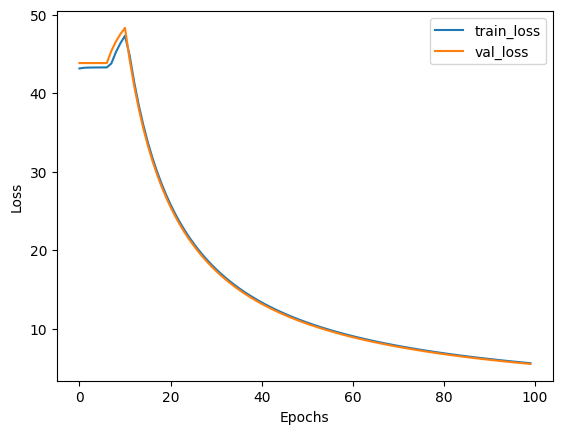

In [41]:
plt.plot(history['loss'], label = 'train_loss')
plt.plot(history['val_loss'], label = 'val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

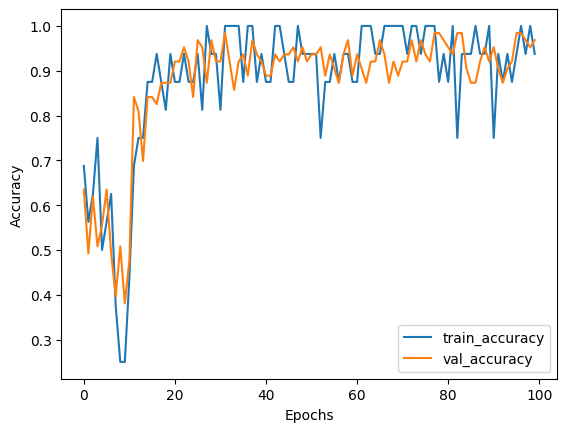

In [42]:
plt.plot(history['accuracy'], label = 'train_accuracy')
plt.plot(history['val_accuracy'], label = 'val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [43]:
### Training evaluation
predicted = model(X_train)
predicted = torch.where(predicted > 0.5, 1, 0)

print("accuracy  # {} ".upper().format(accuracy_score(predicted, y_train)),'\n')
print("precision # {} ".upper().format(precision_score(predicted, y_train)),'\n')
print("recall    # {} ".upper().format(recall_score(predicted, y_train)),'\n')
print("f1_score  # {} ".upper().format(f1_score(predicted, y_train)))

ACCURACY  # 0.9100728155339806  

PRECISION # 0.8000050980092274  

RECALL    # 0.9903755127800568  

F1_SCORE  # 0.8850693024633042 


In [44]:
# Classification report
print(classification_report(predicted, y_train))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     58950
           1       0.80      0.99      0.89     31690

    accuracy                           0.91     90640
   macro avg       0.90      0.93      0.91     90640
weighted avg       0.93      0.91      0.91     90640



In [45]:
### Training evaluation
predicted = model(X_test)
predicted = torch.where(predicted > 0.5, 1, 0)

print("accuracy  # {} ".upper().format(accuracy_score(predicted, y_test)),'\n')
print("precision # {} ".upper().format(precision_score(predicted, y_test)),'\n')
print("recall    # {} ".upper().format(recall_score(predicted, y_test)),'\n')
print("f1_score  # {} ".upper().format(f1_score(predicted, y_test)))

ACCURACY  # 0.9093366283110665  

PRECISION # 0.8020081028712348  

RECALL    # 0.9891375190093418  

F1_SCORE  # 0.8857976653696499 


In [46]:
# Classification report
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92     25038
           1       0.80      0.99      0.89     13809

    accuracy                           0.91     38847
   macro avg       0.90      0.93      0.91     38847
weighted avg       0.93      0.91      0.91     38847



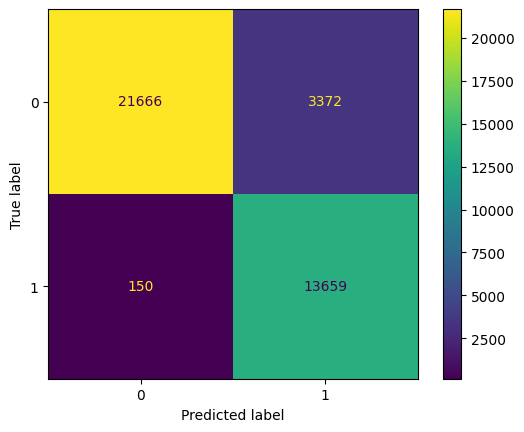

In [47]:
# Cnfusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix(predicted, y_test))
display.plot()
plt.show()

#####Using KFold Cross Validation

In [ ]:
# Using KFold Cross alidation
Kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
#Initialize some of the varibales that is needed
count = 1
accuracy  = []
precision = []
recall = []
f1 = []
history_list = []
X = torch.tensor(data = X, dtype = torch.float32)
# Run a loop
for train_index, test_index in Kfold.split(X):
  """
    Split the dataset into train and test
  """
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  """
      Convert the train & test into expected Float
      X_train: convert into float
      X_test : convert into float
      y_train: convert into float
      y_test : convert into float
  """
  X_train = torch.tensor(data = X_train, dtype = torch.float32)
  X_test  = torch.tensor(data = X_test, dtype = torch.float32)

  y_train = torch.tensor(data = y_train, dtype = torch.float32)
  y_test  = torch.tensor(data = y_test, dtype = torch.float32)

  try:
    model_fit = Fit()
    history = model_fit.fit(x = X_train, y = y_train, val_data = X_test, val_label = y_test, epochs = 25, verbose = 1)
  except Exception as e:
    print(e.with_traceback())
  else:

    print("="*50,"CV # {} ".format(count), "="*50)
    history_list.append(history)

    """

        Compute the result
        1. Accuracy : Determines how accurate the model is !
        2. Precision: Detertimes what proportion of predicted positive is truly positive
        3. Recall : Determines what proportion of predicted positive is being correctly classified
        4. f1_score: It will in between precision and recall.

    """
    predicted = model(X_test)
    predicted = torch.where(predicted > 0.5, 1, 0)

    #########################
    #   Append the result   #
    #########################

    accuracy.append(accuracy_score(predicted, y_test))
    precision.append(precision_score(predicted, y_test))
    recall.append(recall_score(predicted, y_test))
    f1.append(f1_score(predicted, y_test))

    ##########################
    #   Display the result   #
    ##########################

    print("accuracy  # {} ".upper().format(accuracy_score(predicted, y_test)),'\n')
    print("precision # {} ".upper().format(precision_score(predicted, y_test)),'\n')
    print("recall    # {} ".upper().format(recall_score(predicted, y_test)),'\n')
    print("f1_score  # {} ".upper().format(f1_score(predicted, y_test)))

    count = count + 1

    print("\n"*5)


Epoch 1/25 
64/64 [================================] loss: 0.6933876238648283 - accuracy: 0.5405405405405406 - val_loss: 0.745012143659003 - val_accuracy: 0.5952380952380952 
Epoch 2/25 
64/64 [================================] loss: 0.5001127218702202 - accuracy: 0.9459459459459459 - val_loss: 0.45912480253128357 - val_accuracy: 0.9523809523809523 
Epoch 3/25 
64/64 [================================] loss: 0.40980046397868514 - accuracy: 0.8918918918918919 - val_loss: 0.36118203527888154 - val_accuracy: 0.9047619047619048 
Epoch 4/25 
64/64 [================================] loss: 0.3619287144128116 - accuracy: 0.9459459459459459 - val_loss: 0.31398714186600696 - val_accuracy: 0.9761904761904762 
Epoch 5/25 
64/64 [================================] loss: 0.33281942801187625 - accuracy: 0.9459459459459459 - val_loss: 0.2855577164814796 - val_accuracy: 0.8809523809523809 
Epoch 6/25 
64/64 [================================] loss: 0.31303310389455047 - accuracy: 0.9459459459459459 - val_

#####Do the evaluation

In [ ]:
####################
#    KFOLD = 5     #
####################

print("Accuray   # {} ".upper().format(np.array(accuracy).mean()),'\n')
print("Precision # {} ".upper().format(np.array(precision).mean()),'\n')
print("Recall    # {} ".upper().format(np.array(recall).mean()),'\n')
print("f1_score  # {} ".upper().format(np.array(f1).mean()))

ACCURAY   # 0.92851014548498  

PRECISION # 0.8770782565092048  

RECALL    # 0.9557396747461155  

F1_SCORE  # 0.9139289866907532 


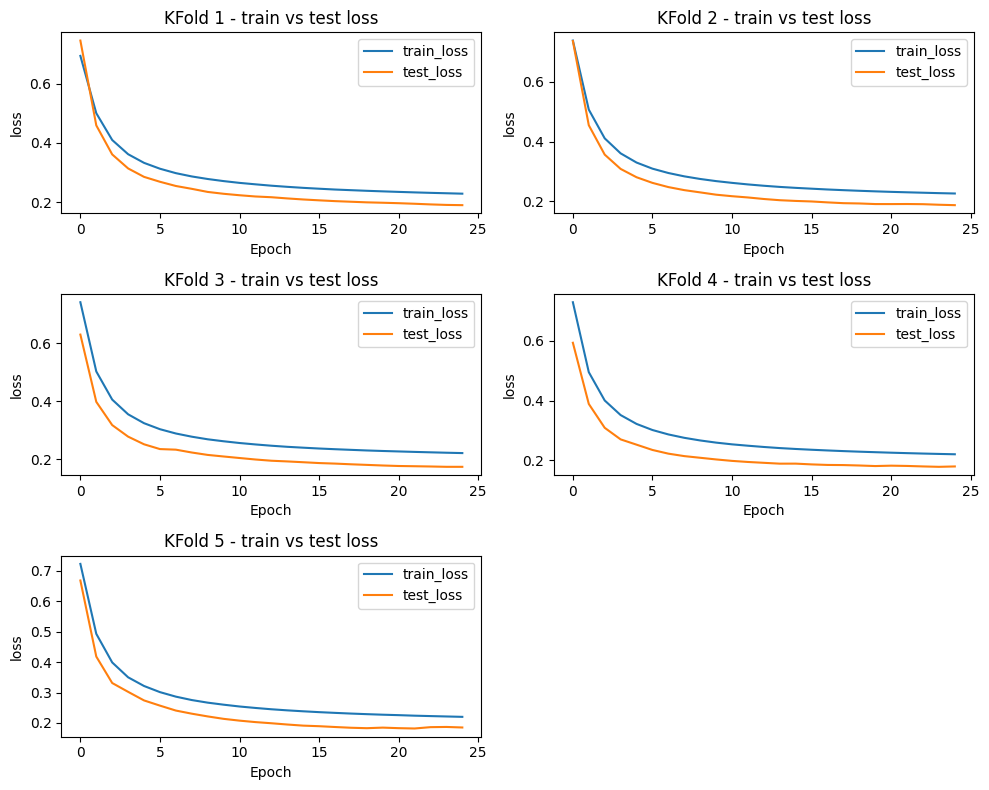

In [ ]:
#########################
#  Train vs Test loss   #
#########################

plt.figure(figsize = (10, 8))
for index, history_ in enumerate(history_list):
  plt.subplot(3, 2, index + 1)
  plt.title("KFold {} - train vs test loss".format(index + 1))
  plt.plot(history_['loss'], label = 'train_loss')
  plt.plot(history_['val_loss'], label = 'test_loss')
  plt.legend()
  plt.xlabel("Epoch")
  plt.ylabel("loss")

plt.tight_layout()
plt.show()

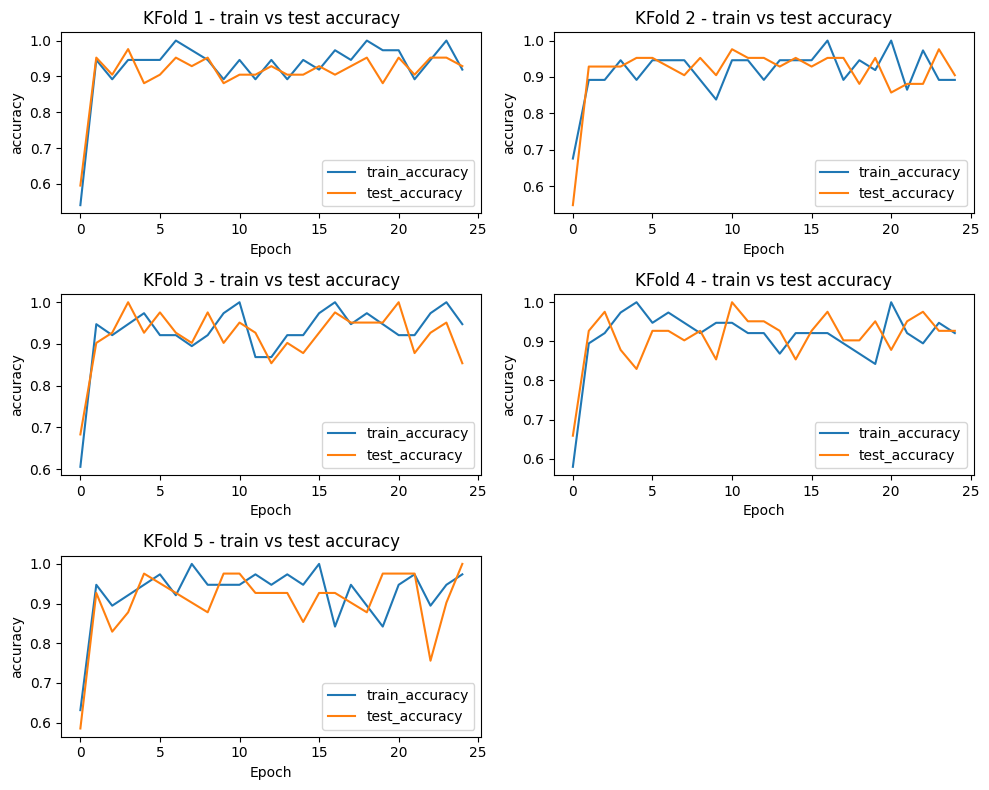

In [ ]:
##############################
#   Train vs Test Accuracy   #
##############################

plt.figure(figsize = (10, 8))
for index, history_ in enumerate(history_list):
  plt.subplot(3, 2, index + 1)
  plt.title("KFold {} - train vs test accuracy".format(index + 1))
  plt.plot(history_['accuracy'], label = 'train_accuracy')
  plt.plot(history_['val_accuracy'], label = 'test_accuracy')
  plt.legend()
  plt.xlabel("Epoch")
  plt.ylabel("accuracy")

plt.tight_layout()
plt.show()

#####Using TensorFlow & Keras

In [53]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

print("X_train shape # {} ".format(X_train.shape),'\n')
print("X_test shape  # {} ".format(X_test.shape),'\n')
print("y_train shape # {} ".format(y_train.shape),'\n')
print("y_test shape  # {} ".format(y_test.shape))

X_train shape # (90640, 22)  

X_test shape  # (38847, 22)  

y_train shape # (90640,)  

y_test shape  # (38847,) 


In [54]:
# Create the Sequential model
model = Sequential()

"""
    Create the First Hidden Layer with
    neurons: 256,
    Activation (ReLU),
    Dropout (ratio = 0.6)
"""
model.add(Dense(units = 256,\
                activation = 'relu',\
                kernel_initializer = 'he_normal',\
                input_shape = X_train.shape[1:],\
                kernel_regularizer = L2(l2 = 0.001)))

# Add the dropout layer with ratio: 0.2
model.add(Dropout(rate = 0.3))

"""
    Create the Second Hidden Layer with
    neurons: 128,
    Activation (ReLU),
    Dropout (ratio = 0.6)
"""
model.add(Dense(units = 128,\
                activation = 'relu',\
                kernel_initializer = 'he_normal',\
                kernel_regularizer = L2(l2 = 0.001)))

# Add the dropout layer with rate: 0.2
model.add(Dropout(0.3))

"""
    Create the Third Hidden Layer with
    neurons: 64,
    Activation (ReLU)
"""
model.add(Dense(units = 64,\
                activation = 'relu',\
                kernel_initializer = 'he_normal',\
                kernel_regularizer = L2(l2 = 0.001)))

"""
    Create the output Hidden Layer with
    neurons: 1,
    Activation (sigmoid),
"""
model.add(Dense(units = 1, activation = 'sigmoid'))

"""
   Compile the model with
   1. loss: binary cross entropy
   2. optimizer: Adam()
"""
model.compile(optimizer = Adam(learning_rate = 0.001), loss = BinaryCrossentropy(), metrics = ['accuracy'])

In [55]:
# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               5888      
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 47,105
Trainable params: 47,105
Non-trai

In [56]:
"""
    Fit the model with
    epochs: 50,
    batch_size: 64
    saved the model loss & accuracy with respect to train and test into history
"""
history = model.fit(x = X_train,\
          y = y_train,\
          epochs = 100,\
          batch_size = 64,\
          validation_data = (X_test, y_test),\
          verbose = 1)

Epoch 1/100
1417/1417 [==============================] - 6s 4ms/step - loss: 7.7762 - accuracy: 0.5554 - val_loss: 1.1200 - val_accuracy: 0.5616
Epoch 2/100
1417/1417 [==============================] - 6s 4ms/step - loss: 1.0568 - accuracy: 0.5752 - val_loss: 0.9955 - val_accuracy: 0.5616
Epoch 3/100
1417/1417 [==============================] - 6s 4ms/step - loss: 0.9611 - accuracy: 0.5716 - val_loss: 0.9302 - val_accuracy: 0.5616
Epoch 4/100
1417/1417 [==============================] - 6s 5ms/step - loss: 0.9073 - accuracy: 0.5683 - val_loss: 0.8822 - val_accuracy: 0.5616
Epoch 5/100
1417/1417 [==============================] - 5s 4ms/step - loss: 0.8607 - accuracy: 0.5672 - val_loss: 0.8359 - val_accuracy: 0.5616
Epoch 6/100
1417/1417 [==============================] - 6s 5ms/step - loss: 0.8144 - accuracy: 0.5671 - val_loss: 0.7938 - val_accuracy: 0.5616
Epoch 7/100
1417/1417 [==============================] - 6s 4ms/step - loss: 0.7752 - accuracy: 0.5672 - val_loss: 0.7568 - val_ac

In [57]:
predicted = model.predict(X_test)
predicted = np.where(predicted > 0.5, 1, 0)

print("accuracy  # {} ".upper().format(accuracy_score(predicted, y_test)),'\n')
print("precision # {} ".upper().format(precision_score(predicted, y_test)),'\n')
print("recall    # {} ".upper().format(recall_score(predicted, y_test)),'\n')
print("f1_score  # {} ".upper().format(f1_score(predicted, y_test)))

1214/1214 [==============================] - 2s 1ms/step
ACCURACY  # 0.599737431461889  

PRECISION # 0.08707650754506488  

RECALL    # 0.9993261455525606  

F1_SCORE  # 0.1601944369430192 


In [58]:
predicted = model.predict(X_train)
predicted = np.where(predicted > 0.5, 1, 0)

print("accuracy  # {} ".upper().format(accuracy_score(predicted, y_train)),'\n')
print("precision # {} ".upper().format(precision_score(predicted, y_train)),'\n')
print("recall    # {} ".upper().format(recall_score(predicted, y_train)),'\n')
print("f1_score  # {} ".upper().format(f1_score(predicted, y_train)))

2833/2833 [==============================] - 4s 1ms/step
ACCURACY  # 0.6032546337157988  

PRECISION # 0.08342892100634702  

RECALL    # 0.9990842490842491  

F1_SCORE  # 0.1539981650081163 


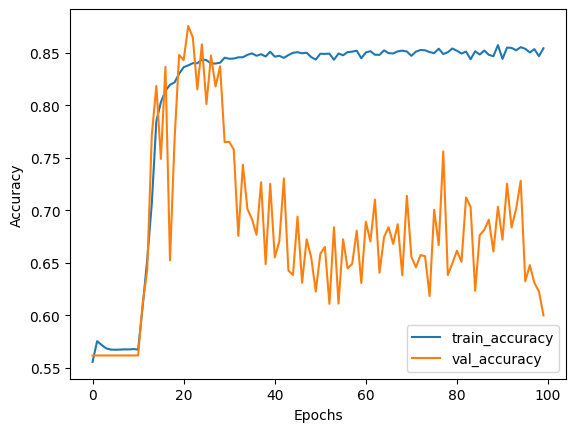

In [59]:
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

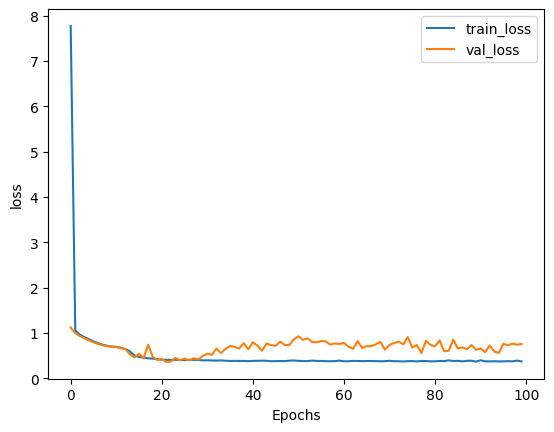

In [60]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()